# JODA 2022 Learning diary

This notebook is available on: https://github.com/htaim/JODA2022/blob/main/Oppimispaivakirja.ipynb

You can also run the notebook on Google Colab: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/htaim/JODA2022/blob/main/Oppimispaivakirja.ipynb)

## Week 1 - Introduction

Created Git Repository: https://github.com/htaim/JODA2022

The learning diary for this cource will be updated on that Git Repository once a week minimum.

I created that repository and cloned it into my laptop in TUNI OneDrive folder, so there is a backup of backup with this implementation. Version control in Git is easy, and commits will be done often. This ensures agility with going back to older versions. Git is easy to use from command line. At the end of the course, the whole learning diary can be published for easy access with .zip export.

This week I participated in live lecture, and watched the demo session recording. I noticed that the course staff uses MacOS devices, and some of the installation steps could be explained a little more specified format. I think that is not relevant to only show "type pip install...", but explain the different installation options and how they differ from each other.

### Week's insights

Learned to create a Git repo and new insight about how they work. I also improved in creating ssh keys and using command line. I had never heard of a Jupyter Notebook (or Jupyter Lab), so this week's biggest insight was information about them. I also learned how to use them with Python code and Markdown formatting. I have used Python quite a bit, but still haven't used that much Pandas library. This week gave me idea on how to use some basic Pandas functions and some data formatting.

### Code demo

In [7]:
#Demo how to import data into this Python notebook, and do some basic analysis
#Code illustrated in this partially referenced from: https://github.com/InfoTUNI/joda2022/blob/master/koodiesimerkit/Session%201%20-%20Analysis%20of%20Transactions.ipynb
#Libraries can be imported as:
import pandas
import matplotlib.pyplot as plot
from matplotlib import style

In [12]:
#Data can be imported into pandas from url containing a csv file:
url = 'https://github.com/jodatut/2020/raw/master/koodiesimerkit/SalesJan2009.csv'

dataframe = pandas.read_csv(url)

#An overview of data and data types
print(dataframe.head())
print(dataframe.dtypes)

  Transaction_date   Product  Price Payment_Type               Name  \
0      1/2/09 6:17  Product1   1200   Mastercard           carolina   
1      1/2/09 4:53  Product1   1200         Visa             Betina   
2     1/2/09 13:08  Product1   1200   Mastercard  Federica e Andrea   
3     1/3/09 14:44  Product1   1200         Visa              Gouya   
4     1/4/09 12:56  Product2   3600         Visa            Gerd W    

                           City     State         Country Account_Created  \
0                      Basildon   England  United Kingdom     1/2/09 6:00   
1  Parkville                           MO   United States     1/2/09 4:42   
2  Astoria                             OR   United States    1/1/09 16:21   
3                        Echuca  Victoria       Australia   9/25/05 21:13   
4  Cahaba Heights                      AL   United States  11/15/08 15:47   

     Last_Login   Latitude   Longitude  
0   1/2/09 6:08  51.500000   -1.116667  
1   1/2/09 7:49  39.195000  

In [9]:
#The datatypes can be changed:
dataframe['Transaction_date'] = pandas.to_datetime(dataframe['Transaction_date'])
print(dataframe.dtypes)

Transaction_date    datetime64[ns]
Product                     object
Price                        int64
Payment_Type                object
Name                        object
City                        object
State                       object
Country                     object
Account_Created             object
Last_Login                  object
Latitude                   float64
Longitude                  float64
dtype: object


### Learning outcomes

1. My goal is to take a step forward to data analytics, learn the latest and most important tools and improve myself as a data scientist.
2. I will be chasing the most advanced tools and methods in this course, but the highest course grade will not be my main goal.
3. I try to focus especially on the main assignment. I will use that as a part of my portfolio in CV.

## Week 2 - Data

This week's lecture was about data collecting and cleaning (+reformatting). I attended the lecture. First, we talked about the process of data science. This lecture focused on the preparation step. I watched the demo session recording afterwards, and it was quite interesting! I haven't used scraping or crawling before, or even heard of them. I still have wondered how this kind of data collection could be possible, and demo lecture a gave quite good demostration about it. The important part of lecture was also to understand that you have to keep in mind the legal part when scraping on websites. Authors can fight back crawling with robots.txt-files, which includes information for what's allowed and what is not in this website. The robots.txt is only a guideline, so dynamic website structures are a more effective method.

This week's code session example was quite fast. For example inspecting the different html elements or using other scrapers like BeautifulSoup could be demonstrated more specifically. This would be nice if one can't make it physically to the session.

### Code demo

Here is a demo of crawling website data. Goal is to save the product reviews in clean format. Part of code is referenced from Demo Session 2.

This created a scraper which includes the following code:

class VerkkokauppaScraperSpider(scrapy.Spider):
    name = 'verkkokauppa_scraper'
    allowed_domains = ['verkkokauppa.com']
    start_urls = ['http://verkkokauppa.com/']

    def parse(self, response):
        pass

We need to make the following modifications in order to scraper to collect review information for us. The required elements are inspected manually from Verkkokauppa.com site. In here it's easy to understand, that with dynamic website structures it's possible to make entry-level scrapers useless. Some of the function parameters are hard-coded particularly for this website because parsing html code took quite a long practise :). The following code is in verkkokauppa_scraper.py and output of this code is displayed in verkkokauppa_out.json.

In [10]:
import scrapy
import re

class VerkkokauppaScraperSpider(scrapy.Spider):
    name = 'verkkokauppa_scraper'
    allowed_domains = ['verkkokauppa.com']
    start_urls = ['https://www.verkkokauppa.com/fi/product/332585/Plantronics-Voyager-5200-Bluetooth-kuuloke/reviews']
    
    def parse(self, response):
        
        #Review text saved into string
        review_texts = response.css('[class="review-content-wrapper"] > p::text').extract()

        #Review ratings saved into string
        review_ratings = response.css('[class="review-content__ratings"] > div > div').extract()
        
        #Parse review ratings with format "Arvosana x/x" from html code. Every text review includes four ratings
        for i in range(len(review_ratings)):
            review_ratings[i] = re.findall('[A-Za-z]{8}[ ][0-5][/][0-5]', review_ratings[i])

        #review texts and ratings saved into vector -> returned from function
        for i in range(len(review_texts)):
            review = {
                'text' : review_texts[i],
                'rating': review_ratings[i]
            }
            yield review
        
        #counter for pages
        counter = 1
        max_pages = 3
        
        if(counter <= max_pages): 
            #Moving to next page
            next_page_url = "https://www.verkkokauppa.com/fi/product/332585/Plantronics-Voyager-5200-Bluetooth-kuuloke/reviews?page=" + str(counter)
            counter += 1
            yield response.follow(next_page_url, self.parse)

In [11]:
import pandas
#Read output file
pandas.read_json("verkkokauppa_out.json")

,text,rating
0,"Edellinen vastaava useamman vuoden jo vanha, t...","[Arvosana 1/5, Arvosana 1/5, Arvosana 1/5, Arv..."
1,Vastapuoli ei kuule mitään jos edes auton taus...,"[Arvosana 1/5, Arvosana 1/5, Arvosana 4/5, Arv..."
2,Edellinen yksilö joskus - 19 ostettuna oli läh...,"[Arvosana 1/5, Arvosana 1/5, Arvosana 1/5, Arv..."
3,Toki jos ei mitään taustamelua ole niin laite ...,"[Arvosana 1/5, Arvosana 1/5, Arvosana 2/5, Arv..."
4,"Kaupasta ulos, korvaan ja 15 sekunttia puhe ku...","[Arvosana 1/5, Arvosana 1/5, Arvosana 1/5, Arv..."
5,"Sutta ja sekundaa, kolmas testikappale testattu.","[Arvosana 1/5, Arvosana 1/5, Arvosana 1/5, Arv..."
6,Tämä on nyt jo toinen laite takuuseen ja edell...,"[Arvosana 2/5, Arvosana 2/5, Arvosana 2/5, Arv..."
7,Aikaisempi malli toimi joka olosuhteissa ja me...,"[Arvosana 2/5, Arvosana 2/5, Arvosana 4/5, Arv..."
8,Tuulessa/melussa jos työskentelet niin ääni sa...,"[Arvosana 3/5, Arvosana 2/5, Arvosana 2/5, Arv..."
9,"Ostin samanlaisen, kuin n.5 vuotta sitten. Akk...","[Arvosana 2/5, Arvosana 2/5, Arvosana 2/5, Arv..."


Despite the errors in output file (all numeric reviews in every item + some formatting errors when extracting paragraph text, because some review html bodies have different paragraphs) this excercise and modification from amazon_scraper to verkkokauppa_scraper gave me very important insight on data scraping. I'm sure this code can be developed further when the course goes deeper.

### Week's insight

The two most importat learning outcomes in this week were web crawlers and scrapers. I really had not heard or used them before. The code examples gave me a very good start, and I was able to examine the crawling for different website. I also learned about regular expressions, and how they can be used when evaluating output from html scraping. Overall, this week gave much insight about actually doing data capturing. 

The data amount doesn't always (never) compensate over quality. This can be also learned when doing small scraping from a website. It is much smarter to collect only relevant data, and not even analyse the "noise". Data processing takes time and resources, so it's very important to focus on the essential only, even though nowadays a laptop can have a huge amount of computational power. With this in mind, the preparation step of data analytics becomes even more important. It's also important for data scientist to understand a broad spectrum of different tools and methods, ratrher than focusing in a small area. We live in a world where the information and knowledge evolves with speed, and broader spectrum gives us opportunity to keep up with the developing environment. 

## Week 3 - Machine learning

This week's lecture was about machine learning. First, the difference between machine learning and artificial intelligence was declared. The most important division was between controlled and uncontrolled learning, and this lecutre was about controlled learning. Basiclaly this can mean that we give a dataset to ML model and train it with that a specific amount of times. Machine learning is a broad concept, and an easy way to get started with it is to use excisting Python libraries. Streaming of the lectuers was a quite nice add for the course. Machine learning demos in lecture were interesting, especially the lecturer's "bubblegum" setup.

When talking about machine learning (ML) the question of big data comes in hand. ML models are based on the quantitative data available on training models. You may think that bigger is better, but it's not always like that. Of course we need large amounts of data for ML models, but quality of the data have to be high also. Garbage in - garbage out is also relevant here. 

Features are some kind of characteristics that we want to filter from the big amount of data. This is the key point when training a ML model - it tries to find the features available in the dataset. When talking about natural language processing, this can mean for example specific type of words, but also written in specific order. The order of the words makes the meaning of the sentence. Therefore we have to specify the key characteristics, harmonize them and take out the noise. 

### Code demo

Here is an example from code session where Ml model is trained for loan status prediction. The data cleaning part was especially interesting one, so I decided to focus on that:

In [10]:
!pip install sklearn
!pip install numpy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer as Imputer

In [14]:
df = pd.read_csv("credit_train.csv")
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [16]:
#Example of how to remove columns
cols_to_remove = ['Loan ID','Customer ID']
data = df.drop(cols_to_remove, axis=1)
data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


Here comes the most interesting part: replace non-existing values (aka NaN) with that column's average. This is called a imputation strategy. With missing data you have two options: create new data or delete the whole row if some of the data is missing. 

In [17]:
cols_to_clean =['Current Loan Amount','Credit Score','Annual Income','Years of Credit History',
        'Months since last delinquent','Number of Open Accounts','Number of Credit Problems',
       'Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']

imputer = Imputer()
data[cols_to_clean] = imputer.fit_transform(data[cols_to_clean])
data[cols_to_clean] = data[cols_to_clean].astype(int)

#Remove rows that still contain at least one NaN value
data=data.dropna()
data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412,Short Term,709,1167493,8 years,Home Mortgage,Home Improvements,5214.74,17,34,6,1,228190,416746,1,0
1,Fully Paid,262328,Short Term,1076,1378276,10+ years,Home Mortgage,Debt Consolidation,33295.98,21,8,35,0,229976,850784,0,0
2,Fully Paid,99999999,Short Term,741,2231892,8 years,Own Home,Debt Consolidation,29200.53,14,29,18,1,297996,750090,0,0
3,Fully Paid,347666,Long Term,721,806949,3 years,Own Home,Debt Consolidation,8741.90,12,34,9,0,256329,386958,0,0
4,Fully Paid,176220,Short Term,1076,1378276,5 years,Rent,Debt Consolidation,20639.70,6,34,15,0,253460,427174,0,0


This week I learned more about ML models and how to actually develop one. Very interesting stuff with nice twists presented in the lecture and demo session. There are a few fallacies not to fall when doing ML models. Most of them are familiar to me, but this image is pretty good stuff. (from week 3 lecutre material)
![](./fallacies.jpg)

## Week 4 - Ideas for the project

This week's lecture was an interactive one where we discussed about the possibilities in course's project. The main focus was on Airbnb dataset, and we searched for the different opportunities to achieve via data analytics with that one. We talked about the different commercial requirements and how to support Airbnb business with data analytics. 

I personally interested about utilizing my own personal training data in the porject. I have this data available from multiple years, so the machine learning could be done based on my own personal parameters. I think that it would be appropriate to estimate some kind of models for my own training. This would not be generalized, the ML model needs to be "taught" with the specific person's parameters. I still haven't decided if I'm going forward with this on the project, but here is an example of the data.

Here is an example of dataset which I have recorded with my fitness device Garmin Edge 1030. The activity is about one hour long, and recording interval has been one second so there is 3694 entries in this dataset. This activity was exported in .fit format, and converted into .csv file with particular FitFileTool.

In [26]:
import pandas
import matplotlib.pyplot as plot
from matplotlib import style
#Import activity data in csv format
df_activity = pandas.read_csv("activity_output.csv")
#Rename first colum
df_activity = df_activity.rename(columns={"AccumulatedPower":"CumulativeWork"}, errors = "raise")
df_activity

,CumulativeWork,Cadence,Distance,FractionalCadence,HeartRate,LeftRightBalance,Power,Temperature,Timestamp
0,295,94,0,0,143,181,295,18,1013616118
1,560,98,0,0,145,174,265,18,1013616119
2,861,101,0,0,145,178,301,18,1013616120
3,1062,91,0,0,147,199,201,18,1013616121
4,1375,85,0,0,147,180,313,18,1013616122
...,...,...,...,...,...,...,...,...,...
3689,1070492,84,0,0,202,178,488,17,1013619807
3690,1070984,85,0,0,202,178,492,17,1013619808
3691,1071430,84,0,0,202,177,446,17,1013619809
3692,1071876,84,0,0,203,177,446,17,1013619810


One interesting factor for describing training intensity in cycling activities is physical work. This particular activity was recorded with power meter, which records the power input for the pedals. Power input is described in watts, which is an SI-unit for J/s. When multiplying that with seconds, you can get the physical work for particular time series. The recording interval in my fitness device is set to 1 s, so cumulative work in the activity can be pretty easily calculated (and is actually already calculated in the output file of my activity). 

### Cumulative power aka physical work in kJ

<AxesSubplot:xlabel='time (s)', ylabel='CumulativeWork (kJ)'>

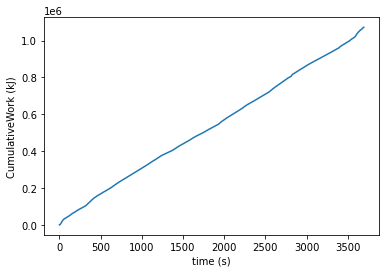

In [32]:
df_activity["CumulativeWork"].plot(xlabel = "time (s)", ylabel = "CumulativeWork (kJ)")

This week I learned about the restrictions of different data for the project. The training data seems a little hard to be developed into ML model, but I'll keep looking into it more. The Airbnb data seems like a valid choise, and the lecture gave a good insight to it while discussing with other students. It would've been nice to develop some kind of model in the lecture, but maybe that is saved for the project itself.

## Week 5 - NLP

This week was a visiting lecture about natural language processing (NLP). It was held on Google Meet, and I was there listening on Futurice's case about NLP processing. The host presented code demo about ML NLP model and it's applications. The ML model focused on fastText NLP library, which was totally new to me. It was quite interesting lecture. They demoed us on how to create a ML model which can predict Finland's ministry based on the input text provided for the model. The model was taught with train data which included ministeries written answers on various questions. Based on that, the model could predict a ministry based on for example a Tweet. Below is gathered a few parts of the code which I find particularly interesting. Original code can be found here: https://github.com/MikkonenTS/Futurice-Joda

### Code demo

In the previous week I demoed how to preprocess data, so here that part is skipped, and we move straight to building the ML model. Futurice showed us how to create a fastText ML model, which is a NLP librarty which can help us to handle word with vectors. The whole preprocessing can be found on the link below.

In [ ]:
#Library to be used in ML model. This code can be run only on MacOS or Linux environment (Google Colab is an excellent option, remember to upload necessary files from JODA repo)
import fasttext as ft

In [ ]:
#Path for the training model
input = "/train_ft.txt"

#Label prefix for the model
label_prefix = "__label__"

#Number of iterations which the training model goes through
epoch = 100

#Size of the ngrams created
word_ngrams = 4

#Dimension of the vectors
dim = 100

#Size for the vectors created
ws = 4

#Actual training for the model
ft_classifier = ft.train_supervised(
                          input = input,
                          label_prefix = label_prefix,
                          epoch = epoch, 
                          dim = dim,
                          word_ngrams = word_ngrams,
                          ws = ws
                          )

In [ ]:
#Test the model accuracy, remember confusion matrix!
ft_classifier.test("/test_ft.txt", 1)

In [ ]:
#Function to test the model with external data
def predict_text(text):
    return ft_classifier.predict(text)

In [ ]:
test_text = "Onko Euroopassa täysin ymmärretty, mitä Venäjän hyökkäys tarkoittaisi"
print(predict_text(test_text)[0][0], "\n", round(predict_text(test_text)[1][0],3))

<img src="fastText_test.png">

This week I also learned about Google Colaboratory, which the host talked a little bit in the beginning of the lecture. I never had used it beforfe, but it seems a pretty valid free choice for some basic computing. I added link to this notebook so it can be executed in Colab pretty easily. The downside with Colab is the irregular computing power, and therefore I chose the MS Azure ML for project environment. The visiting lecture gave good insigt about data scientist's day-to-day life, as well as some employment opportunities in this field. A live lecture would have been even more exciting.